In [144]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [173]:
def linear_forward(weights, biases, inputs):
    print(f"\n[DEBUG] linear_forward -----")
    
    print(f"[DEBUG] weights.shape: {weights.shape}, biases.shape: {biases.shape}, inputs.shape: {inputs.T.shape}")
    z = np.matmul(weights, inputs.T) + biases    
    print(f"[DEBUG] z.shape: {z.shape}")
    
    return z

In [174]:
def activation_linear_forward(z):
    print(f"\n[DEBUG] activation_linear_forward -----")
    
    print(f"[DEBUG] z.shape: {z.shape}")
    a = 1.0/(1.0 + np.exp(-z))
    print(f"[DEBUG] a.shape: {a.shape}")
    
    return a

In [175]:
def cross_entropy_loss(y, y_hat):
    print(f"\n[DEBUG] cross_entropy_loss -----")
    
    y = y.reshape(y_hat.shape)
    
    print(f"[DEBUG] y.shape: {y.shape}, y_hat.shape: {y_hat.shape}")
    cross_entropy_loss = (-1/y.shape[1]) * np.sum((y * np.log(y_hat) + (1-y) * np.log(1-y_hat)))
    return cross_entropy_loss

In [176]:
def calculate_gradients(activations, y, X):
    print(f"\n[DEBUG] calculate_gradient -----")
    
    y = y.reshape(activations.shape)
    
    print(f"[DEBUG] activations.shape: {activations.shape}, y.shape: {y.shape}, X.shape: {X.shape}")
    gradients = np.matmul((activations - y), X)
    print(f"[DEBUG] gradients.shape: {gradients.shape}")
    
    return gradients

In [177]:
def update_weights(weights, gradients, learning_rate):
    print(f"\n[DEBUG] update_weights -----")
    
    print(f"[DEBUG] weights.shape: {weights.shape}, gradients.shape: {gradients.shape}")
    weights = weights - learning_rate*gradients
    print(f"[DEBUG] weights.shape: {weights.shape}")
    
    return weights

In [178]:
def train(weights, inputs, outputs, epochs, lr=0.01):
    costs = []
    for epoch in range(epochs):
        print(f"\n=============== epoch: {epoch} ===============")
        z = linear_forward(weights, biases, inputs)
        a = activation_linear_forward(z)
        gradients = calculate_gradients(a, outputs, inputs)
        weights = update_weights(weights, gradients, lr)
        cost = cross_entropy_loss(outputs, a)
        costs.append(cost)
        print(f"cost:{cost}")
    
    
    y_hat = np.around(a).reshape(outputs.shape)
    print(f"classification_report:\n{classification_report(outputs, y_hat)}")
    plt.plot(range(epochs), costs)
    
    return weights, biases


In [179]:
def init_weights(input_size):
    weights = np.random.random((1, input_size))
    return weights

def init_biases():
    biases = np.zeros((1,1))
    return biases

In [180]:
iris = datasets.load_iris()
X = iris.data
y =  iris.target.reshape(len(iris.target), 1)

to_remove = y!=2
X = X[to_remove.reshape(1,150)[0]]
y = y[to_remove]

X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X.shape: (100, 4)
y.shape: (100,)
X_train.shape: (80, 4)
y_train.shape: (80,)
X_test.shape: (20, 4)
y_test.shape: (20,)


In [185]:
weights = init_weights(X.shape[1])
biases = init_biases()

print(f"weights.shape: {weights.shape}")
print(f"biases.shape: {biases.shape}")

weights.shape: (1, 4)
biases.shape: (1, 1)



=============== epoch: 0 ===============

[DEBUG] linear_forward -----
[DEBUG] weights.shape: (1, 4), biases.shape: (1, 1), inputs.shape: (4, 80)
[DEBUG] z.shape: (1, 80)

[DEBUG] activation_linear_forward -----
[DEBUG] z.shape: (1, 80)
[DEBUG] a.shape: (1, 80)

[DEBUG] calculate_gradient -----
[DEBUG] activations.shape: (1, 80), y.shape: (1, 80), X.shape: (80, 4)
[DEBUG] gradients.shape: (1, 4)

[DEBUG] update_weights -----
[DEBUG] weights.shape: (1, 4), gradients.shape: (1, 4)
[DEBUG] weights.shape: (1, 4)

[DEBUG] cross_entropy_loss -----
[DEBUG] y.shape: (1, 80), y_hat.shape: (1, 80)
cost:2.7662230992579557

=============== epoch: 1 ===============

[DEBUG] linear_forward -----
[DEBUG] weights.shape: (1, 4), biases.shape: (1, 1), inputs.shape: (4, 80)
[DEBUG] z.shape: (1, 80)

[DEBUG] activation_linear_forward -----
[DEBUG] z.shape: (1, 80)
[DEBUG] a.shape: (1, 80)

[DEBUG] calculate_gradient -----
[DEBUG] activations.shape: (1, 80), y.shape: (1, 80), X.shape: (80, 4)
[DEBUG] grad

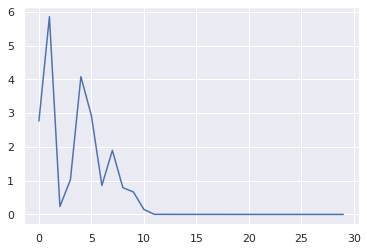

In [186]:
weights, biases = train(weights, inputs=X_train, outputs=y_train, epochs=30)

In [183]:
def predict(X, y, weights, biases):
    z = linear_forward(weights, biases, X)
    a = activation_linear_forward(z)
    
    y_hat = np.around(a).reshape(y.shape)
    print(f"\nclassification_report:\n{classification_report(y, y_hat)}")
    

In [184]:
predict(X_test, y_test, weights, biases)


[DEBUG] linear_forward -----
[DEBUG] weights.shape: (1, 4), biases.shape: (1, 1), inputs.shape: (4, 20)
[DEBUG] z.shape: (1, 20)

[DEBUG] activation_linear_forward -----
[DEBUG] z.shape: (1, 20)
[DEBUG] a.shape: (1, 20)

classification_report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

